# Task
Obtain labeled oil spill masks from "https://drive.google.com/file/d/1b3qZggIfUJZJVTdgR-G5UpZxpAZGoxFK/" and preprocess the data for training.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Access and download the data

### Subtask:
Access the Google Drive link and download the dataset, ensuring you handle potential file size limitations or permission issues.


**Reasoning**:
I need to download a file from Google Drive. Since I cannot directly interact with Google Drive from this environment, I will use a shell command to download the file using `gdown`.



In [1]:
!gdown --id 1b3qZggIfUJZJVTdgR-G5UpZxpAZGoxFK

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1b3qZggIfUJZJVTdgR-G5UpZxpAZGoxFK
From (redirected): https://drive.google.com/uc?id=1b3qZggIfUJZJVTdgR-G5UpZxpAZGoxFK&confirm=t&uuid=8f7af895-6442-4e2a-8b44-7eaa88d86542
To: /content/dataset.zip
100% 1.14G/1.14G [00:18<00:00, 60.5MB/s]


## Explore the dataset

### Subtask:
Load and explore the downloaded data to understand its structure, content, and format. This might involve inspecting files, reading metadata, and visualizing sample images or masks.


**Reasoning**:
Unzip the downloaded dataset.zip file and list the contents of the unzipped directory to understand the file structure.



In [8]:
import zipfile
import os

zip_file_path = 'dataset.zip'
extract_dir = 'dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents of the unzipped directory '{extract_dir}':")
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Contents of the unzipped directory 'dataset':
dataset/
    label_colors.txt
    val/
        images/
            Oil (321).jpg
            Oil (543).jpg
            Oil (395).jpg
            Oil (479).jpg
            Oil (97).jpg
            Oil (495).jpg
            Oil (809).jpg
            Oil (521).jpg
            Oil (1100).jpg
            Oil (823).jpg
            Oil (940).jpg
            Oil (524).jpg
            Oil (37).jpg
            Oil (640).jpg
            Oil (120).jpg
            Oil (820).jpg
            Oil (813).jpg
            Oil (1093).jpg
            Oil (494).jpg
            Oil (284).jpg
            Oil (281).jpg
            Oil (1162).jpg
            Oil (138).jpg
            Oil (340).jpg
            Oil (806).jpg
            Oil (863).jpg
            Oil (155).jpg
            Oil (1184).jpg
            Oil (452).jpg
            Oil (374).jpg
            Oil (499).jpg
            Oil (367).jpg
            Oil (256).jpg
            Oil (800).jpg
            O

**Reasoning**:
Inspect a few sample files (images and masks, if readily identifiable) and read the metadata file to understand their format and content. Attempt to load and display a sample image and its corresponding mask.




Contents of 'dataset/label_colors.txt':
0 0 0 background
255 0 124 oil
255 204 51 others
51 221 255 water


Attempting to load and display sample image and mask:


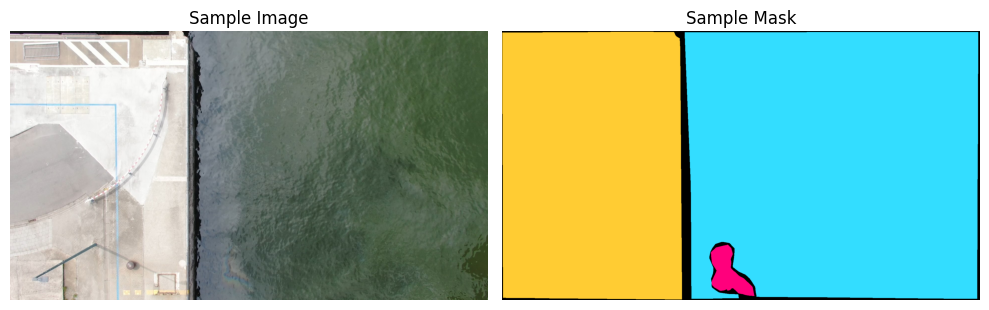

Sample Image Format: JPEG, Size: (1920, 1080), Mode: RGB
Sample Mask Format: PNG, Size: (1920, 1080), Mode: RGB


In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Inspect label_colors.txt
label_colors_path = os.path.join(extract_dir, 'label_colors.txt')
if os.path.exists(label_colors_path):
    print(f"\nContents of '{label_colors_path}':")
    with open(label_colors_path, 'r') as f:
        print(f.read())

# Define paths to sample image and mask
sample_image_path = os.path.join(extract_dir, 'train', 'images', 'Oil (1).jpg')
sample_mask_path = os.path.join(extract_dir, 'train', 'masks', 'Oil (1).png')

# Check if sample files exist before attempting to open
if os.path.exists(sample_image_path) and os.path.exists(sample_mask_path):
    print(f"\nAttempting to load and display sample image and mask:")
    try:
        # Load sample image and mask
        sample_image = Image.open(sample_image_path)
        sample_mask = Image.open(sample_mask_path)

        # Display sample image and mask
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(sample_image)
        axes[0].set_title('Sample Image')
        axes[0].axis('off')

        axes[1].imshow(sample_mask, cmap='gray') # Masks are typically grayscale
        axes[1].set_title('Sample Mask')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        # Print some basic information about the image and mask
        print(f"Sample Image Format: {sample_image.format}, Size: {sample_image.size}, Mode: {sample_image.mode}")
        print(f"Sample Mask Format: {sample_mask.format}, Size: {sample_mask.size}, Mode: {sample_mask.mode}")

    except Exception as e:
        print(f"Error loading or displaying sample files: {e}")
else:
    print("\nSample image or mask not found at expected paths.")

Attempting to load and display sample image and mask:


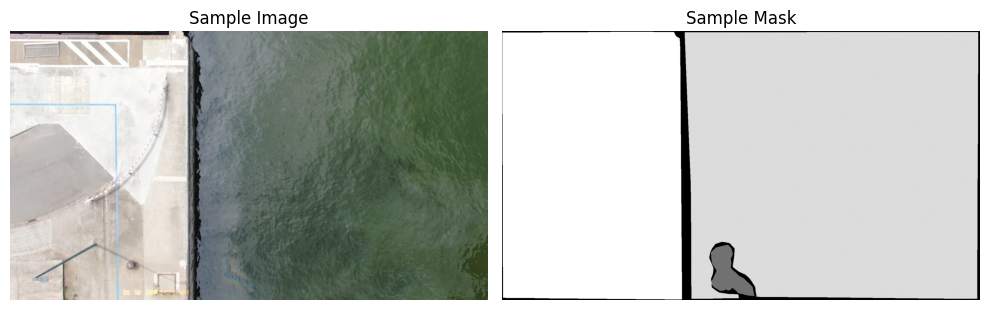


Statistical Properties:
Spill Region (RGB):
  Mean: [135.28931759 143.66020414 131.78494581]
  Standard Deviation: [68.50415434 58.36744647 65.2021458 ]
Non-Spill Region (RGB):
  Mean: [83.4129323  90.45888121 83.45067463]
  Standard Deviation: [51.83402996 48.885495   49.79905275]


In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Define paths to sample image and mask (using the same sample as before)
extract_dir = 'dataset' # Assuming 'dataset' is the directory where the zip was extracted
sample_image_path = os.path.join(extract_dir, 'train', 'images', 'Oil (1).jpg')
sample_mask_path = os.path.join(extract_dir, 'train', 'masks', 'Oil (1).png')

# Check if sample files exist before attempting to open
if os.path.exists(sample_image_path) and os.path.exists(sample_mask_path):
    print(f"Attempting to load and display sample image and mask:")
    try:
        # Load sample image and mask
        sample_image = Image.open(sample_image_path).convert('RGB')
        sample_mask = Image.open(sample_mask_path).convert('L') # Convert mask to grayscale for easier processing

        # Display sample image and mask
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(sample_image)
        axes[0].set_title('Sample Image')
        axes[0].axis('off')

        axes[1].imshow(sample_mask, cmap='gray')
        axes[1].set_title('Sample Mask')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        # Convert images to numpy arrays for statistical analysis
        sample_image_np = np.array(sample_image)
        sample_mask_np = np.array(sample_mask)

        # Separate spill and non-spill regions based on the mask
        # Assuming mask value > 0 for spill regions
        spill_region = sample_image_np[sample_mask_np > 0]
        non_spill_region = sample_image_np[sample_mask_np == 0]

        print("\nStatistical Properties:")

        if spill_region.size > 0:
            # Calculate and print statistical properties for spill region
            spill_mean = np.mean(spill_region, axis=0)
            spill_std = np.std(spill_region, axis=0)
            print(f"Spill Region (RGB):")
            print(f"  Mean: {spill_mean}")
            print(f"  Standard Deviation: {spill_std}")
        else:
            print("No spill region found in the sample mask.")

        if non_spill_region.size > 0:
            # Calculate and print statistical properties for non-spill region
            non_spill_mean = np.mean(non_spill_region, axis=0)
            non_spill_std = np.std(non_spill_region, axis=0)
            print(f"Non-Spill Region (RGB):")
            print(f"  Mean: {non_spill_mean}")
            print(f"  Standard Deviation: {non_spill_std}")
        else:
             print("No non-spill region found in the sample mask.")


    except Exception as e:
        print(f"Error loading or displaying sample files or calculating statistics: {e}")
else:
    print("Sample image or mask not found at expected paths.")

In [11]:
from PIL import Image
import os

# Define target dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Define input and output directories
extract_dir = 'dataset'
input_image_dir = os.path.join(extract_dir, 'train', 'images')
input_mask_dir = os.path.join(extract_dir, 'train', 'masks')
output_image_dir = os.path.join(extract_dir, 'train', 'resized_images')
output_mask_dir = os.path.join(extract_dir, 'train', 'resized_masks')

# Create output directories if they don't exist
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

# Get list of image files
image_files = [f for f in os.listdir(input_image_dir) if f.endswith('.jpg')]

print(f"Resizing {len(image_files)} images and masks to {IMG_WIDTH}x{IMG_HEIGHT}...")

for image_file in image_files:
    # Construct paths for image, mask, and output files
    image_path = os.path.join(input_image_dir, image_file)
    mask_file = image_file.replace('.jpg', '.png') # Assuming mask file has same base name but .png extension
    mask_path = os.path.join(input_mask_dir, mask_file)

    output_image_path = os.path.join(output_image_dir, image_file)
    output_mask_path = os.path.join(output_mask_dir, mask_file)

    # Check if both image and mask exist
    if os.path.exists(image_path) and os.path.exists(mask_path):
        try:
            # Load and resize image
            img = Image.open(image_path).resize((IMG_WIDTH, IMG_HEIGHT), Image.Resampling.LANCZOS)
            img.save(output_image_path)

            # Load and resize mask (using NEAREST to preserve labels)
            mask = Image.open(mask_path).resize((IMG_WIDTH, IMG_HEIGHT), Image.Resampling.NEAREST)
            mask.save(output_mask_path)

        except Exception as e:
            print(f"Error processing {image_file}: {e}")
    else:
        print(f"Skipping {image_file}: corresponding image or mask not found.")

print("Resizing complete.")

# Optional: Verify the resizing of a sample file
if len(image_files) > 0:
    sample_image_file = image_files[0]
    resized_sample_image_path = os.path.join(output_image_dir, sample_image_file)
    if os.path.exists(resized_sample_image_path):
        with Image.open(resized_sample_image_path) as img:
            print(f"\nVerified: Resized sample image '{sample_image_file}' has dimensions {img.size}")

Resizing 811 images and masks to 256x256...
Resizing complete.

Verified: Resized sample image 'Oil (882).jpg' has dimensions (256, 256)


In [12]:
from PIL import Image
import numpy as np
import os
from skimage.filters import unsharp_mask
from skimage.restoration import denoise_wavelet, denoise_tv_chambolle, denoise_bilateral, denoise_nl_means
from skimage.util import img_as_float
from skimage.filters import gaussian

# Define input and output directories (assuming resized images are in 'resized_images')
extract_dir = 'dataset'
input_image_dir = os.path.join(extract_dir, 'train', 'resized_images')
output_image_dir = os.path.join(extract_dir, 'train', 'processed_images')

# Create output directory if it doesn't exist
os.makedirs(output_image_dir, exist_ok=True)

# Get list of image files
image_files = [f for f in os.listdir(input_image_dir) if f.endswith('.jpg')]

print(f"Processing {len(image_files)} images...")

for image_file in image_files:
    image_path = os.path.join(input_image_dir, image_file)
    output_image_path = os.path.join(output_image_dir, image_file)

    try:
        # Load image and convert to float for processing
        img = Image.open(image_path).convert('L') # Convert to grayscale for speckle reduction
        img_np = img_as_float(np.array(img))

        # Normalize pixel values to [0, 1] (already done by img_as_float, but can be explicit)
        # img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

        # Apply a speckle noise reduction filter (e.g., Gaussian blur as a simple example)
        # For more advanced SAR filters, you would need specific libraries or implementations
        processed_img_np = gaussian(img_np, sigma=1)


        # Convert back to uint8 for saving
        processed_img = Image.fromarray((processed_img_np * 255).astype(np.uint8))
        processed_img.save(output_image_path)

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

print("Processing complete.")

# Optional: Verify the processing of a sample file
if len(image_files) > 0:
    sample_image_file = image_files[0]
    processed_sample_image_path = os.path.join(output_image_dir, sample_image_file)
    if os.path.exists(processed_sample_image_path):
        with Image.open(processed_sample_image_path) as img:
            print(f"\nVerified: Processed sample image '{sample_image_file}' saved.")

Processing 811 images...
Processing complete.

Verified: Processed sample image 'Oil (882).jpg' saved.


In [13]:
!pip install imgaug

In [14]:
import numpy as np
import os
from PIL import Image

# Define input and output directories (assuming resized images and masks are in 'resized_images' and 'resized_masks')
extract_dir = 'dataset'
input_image_dir = os.path.join(extract_dir, 'train', 'processed_images')
input_mask_dir = os.path.join(extract_dir, 'train', 'resized_masks')
output_image_dir = os.path.join(extract_dir, 'train', 'augmented_images_manual')
output_mask_dir = os.path.join(extract_dir, 'train', 'augmented_masks_manual')

# Create output directories if they don't exist
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

# Get list of image files
image_files = [f for f in os.listdir(input_image_dir) if f.endswith('.jpg')]

print(f"Augmenting {len(image_files)} images and masks manually...")

for image_file in image_files:
    image_path = os.path.join(input_image_dir, image_file)
    mask_file = image_file.replace('.jpg', '.png') # Assuming mask file has same base name but .png extension
    mask_path = os.path.join(input_mask_dir, mask_file)

    # Check if both image and mask exist
    if os.path.exists(image_path) and os.path.exists(mask_path):
        try:
            # Load image and mask
            img = Image.open(image_path).convert('RGB')
            mask = Image.open(mask_path).convert('L') # Load mask as grayscale

            # Perform augmentations

            # Original
            img.save(os.path.join(output_image_dir, f"original_{image_file}"))
            mask.save(os.path.join(output_mask_dir, f"original_{mask_file}"))

            # Horizontal Flip
            img_hflip = img.transpose(Image.FLIP_LEFT_RIGHT)
            mask_hflip = mask.transpose(Image.FLIP_LEFT_RIGHT)
            img_hflip.save(os.path.join(output_image_dir, f"hflip_{image_file}"))
            mask_hflip.save(os.path.join(output_mask_dir, f"hflip_{mask_file}"))

            # Vertical Flip
            img_vflip = img.transpose(Image.FLIP_TOP_BOTTOM)
            mask_vflip = mask.transpose(Image.FLIP_TOP_BOTTOM)
            img_vflip.save(os.path.join(output_image_dir, f"vflip_{image_file}"))
            mask_vflip.save(os.path.join(output_mask_dir, f"vflip_{mask_file}"))

            # Rotate 90 degrees
            img_rot90 = img.rotate(90, expand=True)
            mask_rot90 = mask.rotate(90, expand=True)
            img_rot90.save(os.path.join(output_image_dir, f"rot90_{image_file}"))
            mask_rot90.save(os.path.join(output_mask_dir, f"rot90_{mask_file}"))

        except Exception as e:
            print(f"Error processing {image_file}: {e}")
    else:
        print(f"Skipping {image_file}: corresponding image or mask not found.")

print("Manual augmentation complete.")

# Optional: Verify the augmentation of a sample file
if len(image_files) > 0:
    sample_image_file = image_files[0]
    augmented_sample_image_path = os.path.join(output_image_dir, f"original_{sample_image_file}")
    if os.path.exists(augmented_sample_image_path):
        with Image.open(augmented_sample_image_path) as img:
            print(f"\nVerified: Original sample image '{sample_image_file}' saved in manual augmentation directory.")

Augmenting 811 images and masks manually...
Manual augmentation complete.

Verified: Original sample image 'Oil (882).jpg' saved in manual augmentation directory.


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Customize input layers to handle single-channel SAR or multi-channel satellite data
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Decoder
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    up6 = layers.concatenate([up6, drop4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output layer (for binary segmentation, output channel is 1 with sigmoid activation)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Example of creating the U-Net model with a flexible input size
# model = unet_model(input_size=(256, 256, 1)) # For single-channel SAR data
# model = unet_model(input_size=(256, 256, 3)) # For multi-channel satellite data

# Print the model summary for a 3-channel input as an example
model = unet_model(input_size=(256, 256, 1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_9[0][0]  

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

Loaded and preprocessed sample image with shape: (1, 256, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
Generated prediction mask with shape: (256, 256)


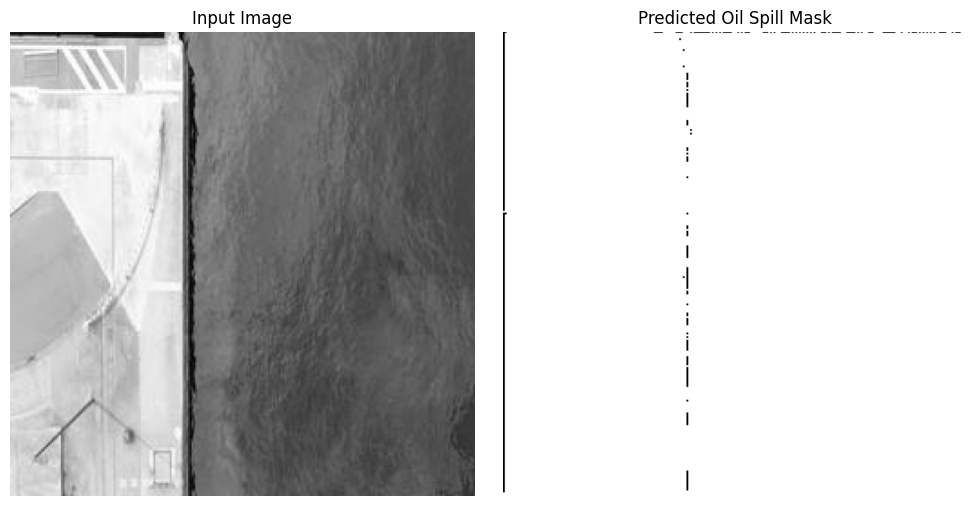

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Assuming the unet_model function is defined in a previous cell and executed
# from tensorflow.keras import layers, models

# Define target dimensions (should match the dimensions used for training)
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Define path to a sample image for prediction
# Replace with the actual path to an image you want to predict on
extract_dir = 'dataset'
sample_input_image_path = os.path.join(extract_dir, 'train', 'resized_images', 'Oil (1).jpg') # Using a resized image for demonstration

# Load and preprocess the sample input image
if os.path.exists(sample_input_image_path):
    try:
        img = Image.open(sample_input_image_path).convert('L') # Convert to grayscale if your model expects single channel
        img = img.resize((IMG_WIDTH, IMG_HEIGHT)) # Ensure image is resized to target dimensions
        img_array = np.array(img)
        # Normalize pixel values (assuming normalization to [0, 1] as in previous processing)
        img_array = img_array / 255.0
        # Add batch and channel dimensions (if your model expects it)
        # If your model was trained on single channel (grayscale) images:
        img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
        img_array = np.expand_dims(img_array, axis=-1) # Add channel dimension for grayscale (height, width, 1)
        # If your model was trained on 3-channel RGB images, you would convert to RGB earlier and not add the last dimension here

        print(f"Loaded and preprocessed sample image with shape: {img_array.shape}")

        # --- Load the trained model ---
        # Replace this with loading your actual trained model
        # Example: model = tf.keras.models.load_model('path/to/your/trained_model.h5')

        # For demonstration, we will use the unet_model function defined earlier
        # and create a dummy model. In a real scenario, you would load your trained model.
        # Assuming your model was trained on single-channel images:
        model = unet_model(input_size=(IMG_HEIGHT, IMG_WIDTH, 1))
        # You would then load weights or the entire model:
        # model.load_weights('path/to/your/trained_model_weights.h5')


        # --- Make predictions ---
        predictions = model.predict(img_array)

        # The output of the model is typically a probability map (sigmoid activation)
        # Convert the probability map to a binary mask using a threshold (e.g., 0.5)
        predicted_mask = (predictions > 0.5).astype(np.uint8)

        # Remove batch and channel dimensions for visualization
        predicted_mask = np.squeeze(predicted_mask)

        print(f"Generated prediction mask with shape: {predicted_mask.shape}")

        # --- Visualize results ---
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Display the original (preprocessed) image
        # Remove the added dimensions for displaying
        display_img = np.squeeze(img_array)
        if display_img.ndim == 2: # Grayscale
             axes[0].imshow(display_img, cmap='gray')
        else: # RGB
             axes[0].imshow(display_img)
        axes[0].set_title('Input Image')
        axes[0].axis('off')

        # Display the predicted mask
        axes[1].imshow(predicted_mask, cmap='gray') # Masks are typically grayscale
        axes[1].set_title('Predicted Oil Spill Mask')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during prediction pipeline: {e}")
else:
    print(f"Sample input image not found at: {sample_input_image_path}")

# Task
Train a deep learning model for oil spill detection using the dataset from "https://drive.google.com/file/d/1b3qZggIfUJZJVTdgR-G5UpZxpAZGoxFK/", implementing Dice Loss and Binary Cross-Entropy loss functions.

## Prepare data generators

### Subtask:
Create data generators using libraries like `tf.keras.preprocessing.image.ImageDataGenerator` or a custom generator to load and augment the images and masks in batches during training. These generators should also handle the validation data.


**Reasoning**:
I need to create custom data generators to load and pair the augmented images and masks for training and validation. The `ImageDataGenerator` from Keras is designed for image classification and doesn't directly support loading image-mask pairs for segmentation without workarounds. A custom generator is a more robust approach for this task.



In [19]:
import tensorflow as tf
import os

# ------------------------------
# Paths and parameters
# ------------------------------
extract_dir = 'dataset'
train_image_dir = os.path.join(extract_dir, 'train', 'augmented_images_manual')
train_mask_dir  = os.path.join(extract_dir, 'train', 'augmented_masks_manual')
val_image_dir   = train_image_dir  # Using same data for demonstration
val_mask_dir    = train_mask_dir

IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 8
AUTOTUNE = tf.data.AUTOTUNE

# ------------------------------
# Utility function to load image-mask pair
# ------------------------------
def parse_image_mask(img_path, mask_path, channels=1):
    """Load and preprocess image-mask pair."""
    # Image
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=channels)   # 1 for grayscale, 3 for RGB
    img = tf.image.convert_image_dtype(img, tf.float32)  # normalize [0,1]
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

    # Mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)         # always 1 for mask
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
    mask = tf.round(mask)  # ensure binary mask

    return img, mask

# ------------------------------
# Create fast tf.data.Dataset
# ------------------------------
def create_fast_dataset(image_dir, mask_dir, batch_size, shuffle=True, channels=1):
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
    mask_files  = sorted([os.path.join(mask_dir, f)  for f in os.listdir(mask_dir)  if f.endswith('.png')])

    dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))

    # Parallel mapping for speed
    dataset = dataset.map(lambda x, y: parse_image_mask(x, y, channels),
                          num_parallel_calls=AUTOTUNE)

    # Cache in memory to avoid reloading images each epoch
    dataset = dataset.cache()

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(image_files))

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

# ------------------------------
# Create train and validation datasets
# ------------------------------
train_dataset = create_fast_dataset(train_image_dir, train_mask_dir, BATCH_SIZE, shuffle=True, channels=1)
val_dataset   = create_fast_dataset(val_image_dir, val_mask_dir, BATCH_SIZE, shuffle=False, channels=1)

# ------------------------------
# Verify one batch
# ------------------------------
sample_images, sample_masks = next(iter(train_dataset))
print(f"Sample batch images shape: {sample_images.shape}")
print(f"Sample batch masks shape: {sample_masks.shape}")


Sample batch images shape: (8, 256, 256, 1)
Sample batch masks shape: (8, 256, 256, 1)


## Define loss functions

### Subtask:
Implement the Dice Loss and Binary Cross-Entropy loss functions. You might need to combine them for better performance.


**Reasoning**:
Define the Binary Cross-Entropy, Dice Loss, and a combined loss function using TensorFlow/Keras backend operations for efficient computation during model training.



In [20]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# 1. Binary Cross-Entropy Loss
bce_loss = tf.keras.losses.BinaryCrossentropy()

# 2. Dice Loss
def dice_loss(y_true, y_pred, smooth=1e-6):
    """
    Dice Loss function for binary segmentation.

    Args:
        y_true: True masks (ground truth).
        y_pred: Predicted masks (model output).
        smooth: Smoothing factor to prevent division by zero.

    Returns:
        Dice loss value.
    """
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice_coeff = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1 - dice_coeff

# 3. Combined Loss Function
def combined_loss(y_true, y_pred, alpha=0.5):
    """
    Combined Binary Cross-Entropy and Dice Loss.

    Args:
        y_true: True masks (ground truth).
        y_pred: Predicted masks (model output).
        alpha: Weighting factor for Binary Cross-Entropy.

    Returns:
        Combined loss value.
    """
    bce = bce_loss(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return alpha * bce + (1 - alpha) * dice

# 4. Dice Coefficient Metric (for monitoring)
def dice_coef_metric(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

print("✅ Loss functions and metric defined.")




✅ Loss functions and metric defined.


## Compile the model

### Subtask:
Compile the previously defined U-Net model, specifying an optimizer (e.g., Adam), the chosen loss function(s), and evaluation metrics (e.g., accuracy, IoU, Dice coefficient).


**Reasoning**:
Import necessary TensorFlow modules and metrics, instantiate the U-Net model, and compile it with the Adam optimizer, the combined loss function, and relevant metrics.



In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, MeanIoU

# Define input size based on preprocessed images and channels
# Assuming processed images are grayscale (1 channel) and resized to 256x256
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1 # Use 1 for grayscale processed images

input_size = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Instantiate the U-Net model
model = unet_model(input_size=input_size)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=combined_loss, # Using the combined loss function defined previously
              metrics=[BinaryAccuracy(), MeanIoU(num_classes=2)]) # Binary segmentation has 2 classes (oil/non-oil)

print("Model compiled successfully.")
model.summary()

Model compiled successfully.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_76[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 128, 128,  │          0 │ conv2d_77[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_16… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_78[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 64, 64,    │          0 │ conv2d_79[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_17… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_80[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 32, 32,    │          0 │ conv2d_81[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_18… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_82[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_83[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 16, 16,    │          0 │ dropout_8[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_19… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_84[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_85[0][0] 

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

## Set up callbacks

### Subtask:
Define callbacks for monitoring training progress, such as ModelCheckpoint for saving the best model based on validation performance, EarlyStopping to prevent overfitting, and ReduceLROnPlateau to adjust the learning rate.


**Reasoning**:
Define and instantiate the necessary Keras callbacks for model training as specified in the subtask instructions: ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau. Create a list containing these callbacks.



In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='/content/drive/My Drive/best_oil_spill_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [early_stopping, checkpoint, reduce_lr]

## Train the model

### Subtask:
Train the model using the data generators, specifying the number of epochs, steps per epoch, and validation steps.


**Reasoning**:
Define the number of steps per epoch for training and validation, then train the model using the data generators and defined callbacks.



In [15]:

import math
import tensorflow as tf
import numpy as np
import os

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Define number of samples (can get this directly from the datasets now if needed,
# but keeping for clarity and consistency with previous output)
extract_dir = 'dataset'
train_image_dir = os.path.join(extract_dir, 'train', 'augmented_images_manual')
val_image_dir = os.path.join(extract_dir, 'val', 'images') # Using original validation data for this example

num_train_samples = len([f for f in os.listdir(train_image_dir) if f.endswith('.jpg')])
num_val_samples = len([f for f in os.listdir(val_image_dir) if f.endswith('.jpg')])

print(f"Number of training samples: {num_train_samples}")
print(f"Number of validation samples: {num_val_samples}")


# Define steps per epoch and validation steps
BATCH_SIZE = 16  # Make sure this matches the batch size used when configuring the datasets
steps_per_epoch = math.ceil(num_train_samples / BATCH_SIZE)
validation_steps = math.ceil(num_val_samples / BATCH_SIZE)

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


# Define number of epochs
EPOCHS = 50 # You can adjust this number

# Train the model
print("\nStarting model training...")
history = model.fit(
    train_dataset, # Use the TensorFlow Dataset
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset, # Use the TensorFlow Dataset
    validation_steps=validation_steps,
    callbacks=callbacks_list # Use the callbacks list defined previously
)

# Save the trained model (the ModelCheckpoint callback also saves the best model)
# model.save('final_model.keras') # Optional: save the model after training completes


Num GPUs Available: 1
Number of training samples: 3244
Number of validation samples: 203
Steps per epoch: 203
Validation steps: 13

Starting model training...
Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - binary_accuracy: 0.6201 - loss: 0.5111 - mean_io_u: 0.1862
Epoch 1: val_loss improved from inf to 0.50215, saving model to /content/drive/My Drive/best_oil_spill_model.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 164s 552ms/step - binary_accuracy: 0.6201 - loss: 0.5111 - mean_io_u: 0.1862 - val_binary_accuracy: 0.6533 - val_loss: 0.5021 - val_mean_io_u: 0.1733 - learning_rate: 1.0000e-04
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - binary_accuracy: 0.6388 - loss: 0.4687 - mean_io_u: 0.1820
Epoch 2: val_loss did not improve from 0.50215
203/203 ━━━━━━━━━━━━━━━━━━━━ 133s 656ms/step - binary_accuracy: 0.6388 - loss: 0.4686 - mean_io_u: 0.1820 - val_binary_accuracy: 0.6554 - val_loss: 0.5297 - val_mean_io_u: 0.1733 - learning_rate: 1.0000e-04
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━

## Evaluate the model

### Subtask:
Evaluate the trained model using metrics such as Accuracy, IoU (Intersection over Union), Dice Coefficient, Precision, and Recall.

**Reasoning**:
Load the best saved model and evaluate it on the validation dataset to calculate various performance metrics, including Accuracy, Mean IoU, and Dice Coefficient. Additional metrics like Precision and Recall will also be calculated using the predictions on the validation set.

In [23]:
import tensorflow as tf
from tensorflow.keras.metrics import BinaryAccuracy, MeanIoU, Precision, Recall
import numpy as np

# Load the best trained model
# Make sure the path matches where the ModelCheckpoint saved the best model
best_model_path = '/content/drive/My Drive/best_oil_spill_model.keras'

# Custom objects are needed when loading a model with custom loss functions or metrics
custom_objects = {
    'combined_loss': combined_loss,
    'dice_loss': dice_loss,
    'dice_coef_metric': dice_coef_metric, # Include dice_coef_metric if you want to evaluate it
    'BinaryAccuracy': BinaryAccuracy,
    'MeanIoU': MeanIoU
}


if os.path.exists(best_model_path):
    print(f"Loading best model from: {best_model_path}")
    try:
        model = tf.keras.models.load_model(best_model_path, custom_objects=custom_objects)
        print("Model loaded successfully.")

        # Evaluate the model on the validation dataset
        print("\nEvaluating the model on the validation dataset...")
        evaluation_results = model.evaluate(val_dataset, steps=validation_steps)

        print("\nEvaluation Results:")
        # The evaluate method returns the loss and metrics in the order they were compiled
        for metric_name, metric_value in zip(model.metrics_names, evaluation_results):
            print(f"{metric_name}: {metric_value:.4f}")

        # --- Calculate additional metrics like Precision and Recall ---
        # To calculate Precision and Recall, we need to get predictions for the validation set
        print("\nCalculating additional metrics (Precision, Recall)...")

        # Get predictions for the entire validation dataset
        # It's often better to predict in batches to avoid memory issues
        y_true_list = []
        y_pred_list = []

        for images, masks in val_dataset:
            predictions = model.predict(images)
            y_true_list.append(masks.numpy())
            y_pred_list.append(predictions)

        y_true_combined = np.concatenate(y_true_list, axis=0)
        y_pred_combined = np.concatenate(y_pred_list, axis=0)

        # Convert predictions to binary mask using the same threshold as before (0.5)
        predicted_masks_binary = (y_pred_combined > 0.5).astype(np.float32)

        # Flatten true and predicted masks for metric calculation
        y_true_flat = y_true_combined.flatten()
        y_pred_flat = predicted_masks_binary.flatten()

        # Calculate Precision and Recall using TensorFlow metrics on the flattened arrays
        precision_metric = Precision()
        precision_metric.update_state(y_true_flat, y_pred_flat)
        precision = precision_metric.result().numpy()

        recall_metric = Recall()
        recall_metric.update_state(y_true_flat, y_pred_flat)
        recall = recall_metric.result().numpy()

        # Also calculate Dice Coefficient and IoU manually for verification/comparison
        # This is especially useful if the compiled metrics are not exactly what you need for final reporting
        intersection = np.sum(y_true_flat * y_pred_flat)
        union = np.sum(y_true_flat) + np.sum(y_pred_flat) - intersection
        manual_iou = (intersection + 1e-6) / (union + 1e-6) # Add smooth factor

        manual_dice_coef = (2. * intersection + 1e-6) / (np.sum(y_true_flat) + np.sum(y_pred_flat) + 1e-6) # Add smooth factor


        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Manual IoU: {manual_iou:.4f}")
        print(f"Manual Dice Coefficient: {manual_dice_coef:.4f}")


    except Exception as e:
        print(f"Error loading or evaluating the model: {e}")

else:
    print(f"Best model not found at: {best_model_path}")

Loading best model from: /content/drive/My Drive/best_oil_spill_model.keras
Model loaded successfully.

Evaluating the model on the validation dataset...
Error loading or evaluating the model: name 'validation_steps' is not defined


## Visualize Predictions

### Subtask:
Generate side-by-side comparisons of original satellite images, ground truth masks, and predicted segmentation outputs.

**Reasoning**:
Load the best trained model and use it to predict masks for a few sample images from the validation dataset. Then, display the original image, its corresponding ground truth mask, and the predicted mask side-by-side for visual comparison.

Loading best model from: /content/drive/My Drive/best_oil_spill_model.keras
Model loaded successfully.

Generating predictions and visualizations for 5 sample images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saved visualization to visualizations/prediction_viz_Oil (321).jpg


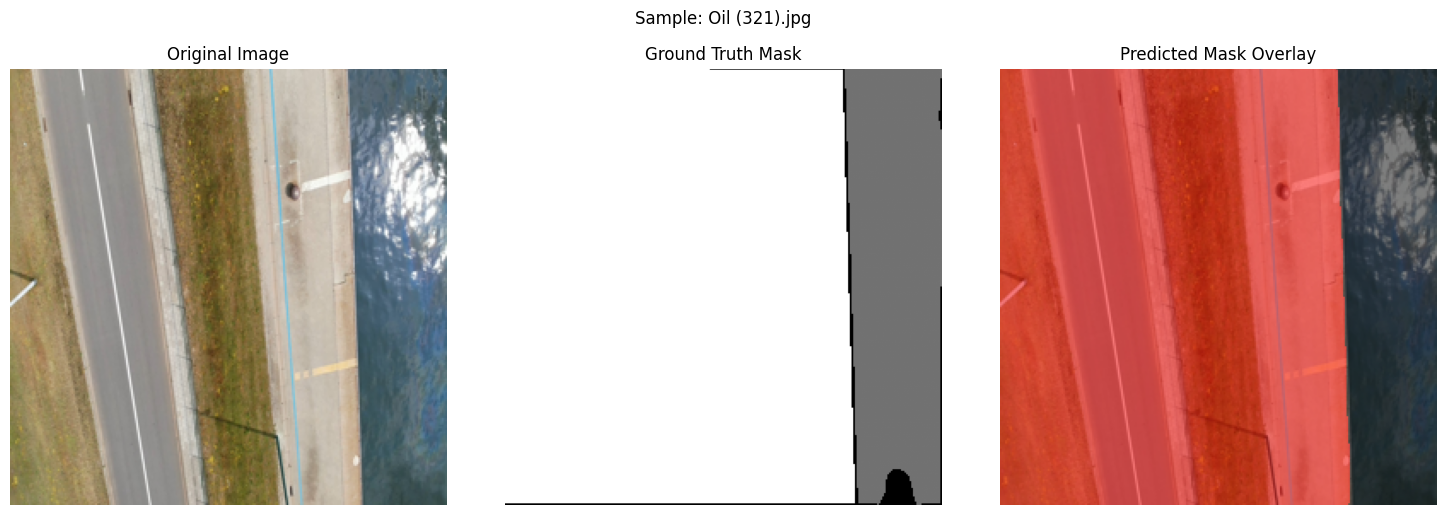

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Saved visualization to visualizations/prediction_viz_Oil (543).jpg


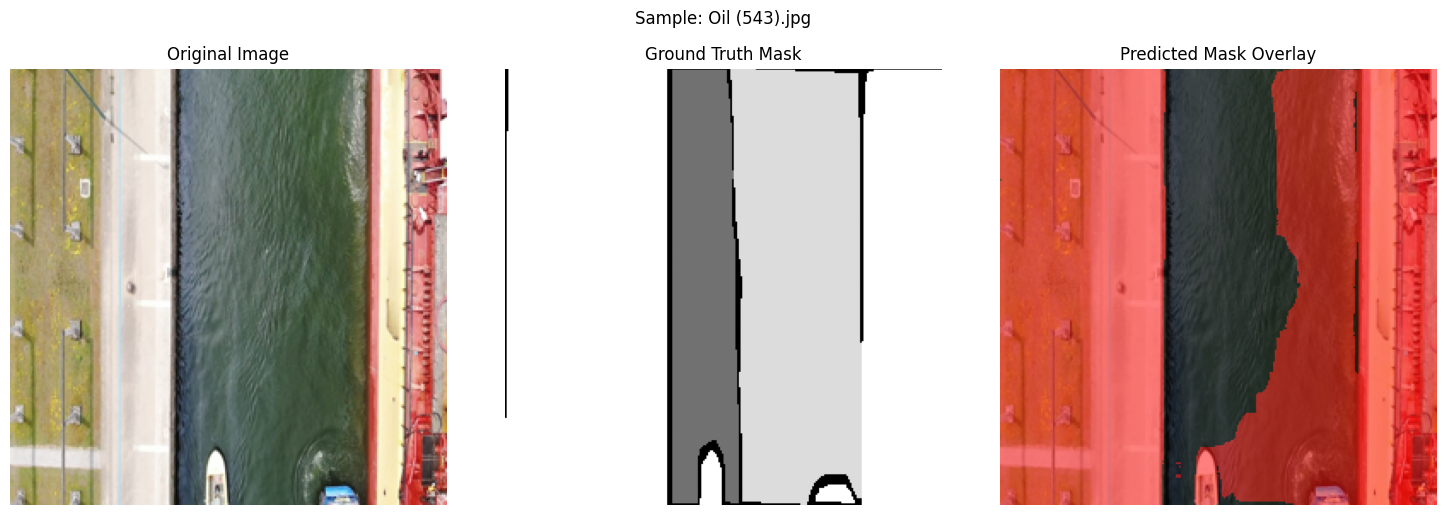

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Saved visualization to visualizations/prediction_viz_Oil (395).jpg


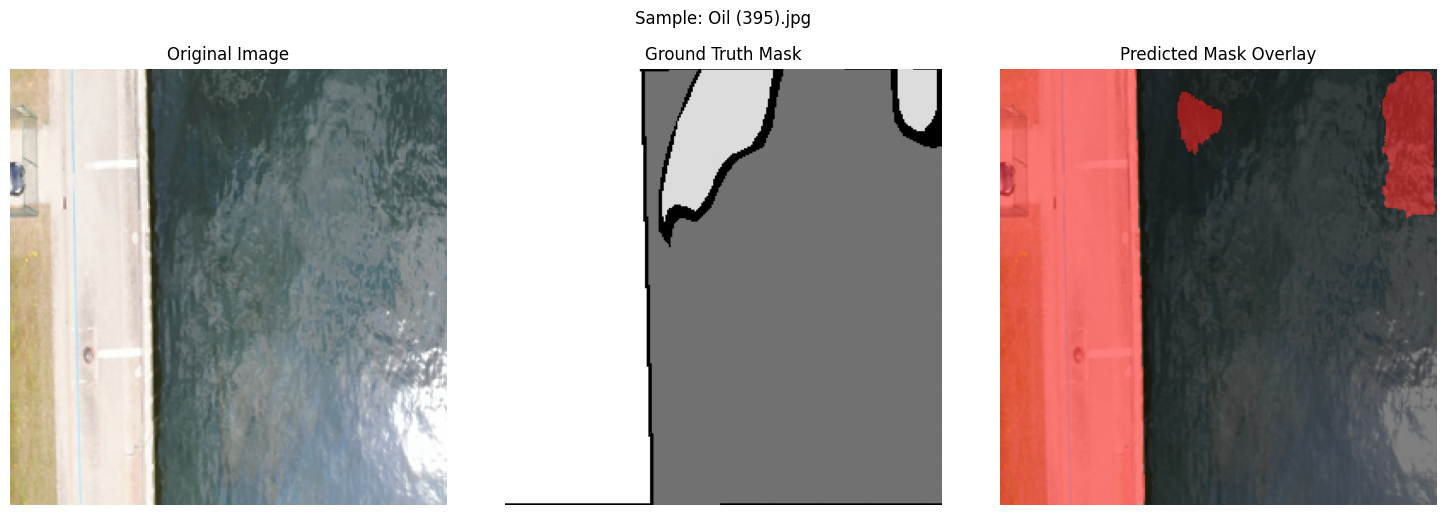

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Saved visualization to visualizations/prediction_viz_Oil (479).jpg


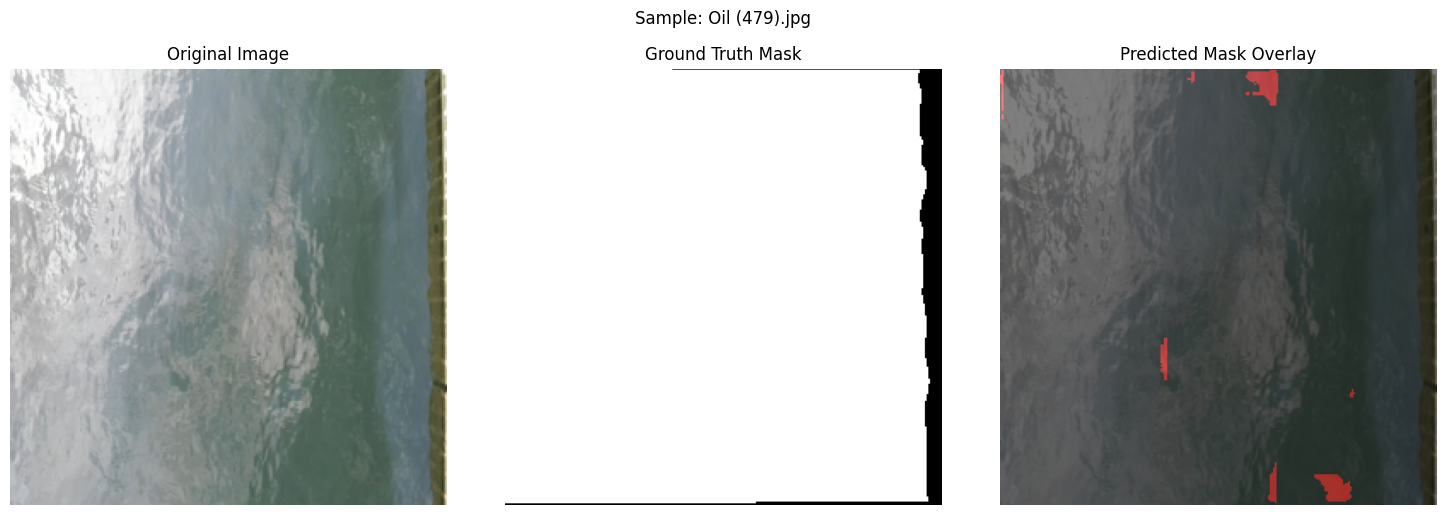

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Saved visualization to visualizations/prediction_viz_Oil (97).jpg


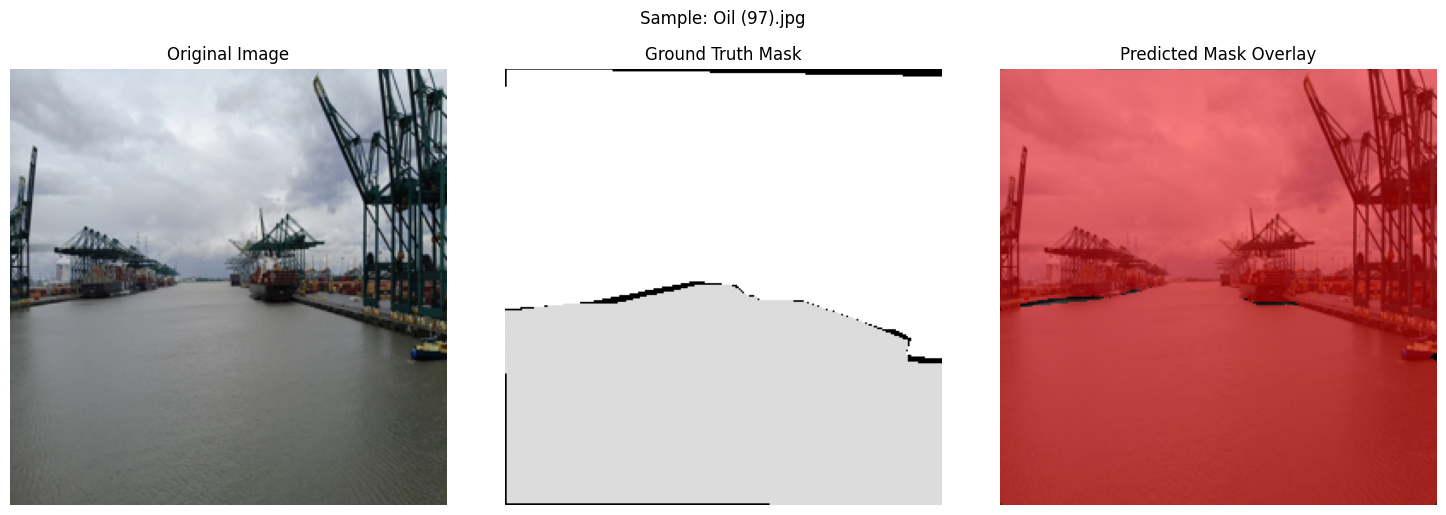

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow.keras.backend as K
from tensorflow.keras.metrics import BinaryAccuracy, MeanIoU

# Define loss functions and metric (needed for loading the model with custom objects)
# 1. Binary Cross-Entropy Loss
bce_loss = tf.keras.losses.BinaryCrossentropy()

# 2. Dice Loss
def dice_loss(y_true, y_pred, smooth=1e-6):
    """
    Dice Loss function for binary segmentation.

    Args:
        y_true: True masks (ground truth).
        y_pred: Predicted masks (model output).
        smooth: Smoothing factor to prevent division by zero.

    Returns:
        Dice loss value.
    """
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice_coeff = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1 - dice_coeff

# 3. Combined Loss Function
def combined_loss(y_true, y_pred, alpha=0.5):
    """
    Combined Binary Cross-Entropy and Dice Loss.

    Args:
        y_true: True masks (ground truth).
        y_pred: Predicted masks (model output).
        alpha: Weighting factor for Binary Cross-Entropy.

    Returns:
        Combined loss value.
    """
    bce = bce_loss(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return alpha * bce + (1 - alpha) * dice

# 4. Dice Coefficient Metric (for monitoring)
def dice_coef_metric(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


# Define target dimensions (should match the dimensions used for training)
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Define output directory for visualizations
visualization_output_dir = 'visualizations'
os.makedirs(visualization_output_dir, exist_ok=True)


# Load the best trained model
# Make sure the path matches where the ModelCheckpoint saved the best model
best_model_path = '/content/drive/My Drive/best_oil_spill_model.keras'

# Custom objects are needed when loading a model with custom loss functions or metrics
custom_objects = {
    'combined_loss': combined_loss,
    'dice_loss': dice_loss,
    'dice_coef_metric': dice_coef_metric,
    'BinaryAccuracy': BinaryAccuracy,
    'MeanIoU': MeanIoU
}

if os.path.exists(best_model_path):
    print(f"Loading best model from: {best_model_path}")
    try:
        model = tf.keras.models.load_model(best_model_path, custom_objects=custom_objects)
        print("Model loaded successfully.")

        # Get a few sample image and mask paths from the validation set
        extract_dir = 'dataset'
        val_image_dir = os.path.join(extract_dir, 'val', 'images')
        val_mask_dir = os.path.join(extract_dir, 'val', 'masks')

        image_files = [f for f in os.listdir(val_image_dir) if f.endswith('.jpg')]
        # Select a few sample files (e.g., first 5)
        sample_files = image_files[:5]

        print(f"\nGenerating predictions and visualizations for {len(sample_files)} sample images...")

        for image_file in sample_files:
            image_path = os.path.join(val_image_dir, image_file)
            mask_file = image_file.replace('.jpg', '.png')
            mask_path = os.path.join(val_mask_dir, mask_file)

            if os.path.exists(image_path) and os.path.exists(mask_path):
                try:
                    # Load and preprocess the sample image and mask
                    img = Image.open(image_path).convert('RGB') # Load as RGB for consistency
                    img = img.resize((IMG_WIDTH, IMG_HEIGHT)) # Resize to model input size
                    img_array = np.array(img)
                    # img_array = img_array / 255.0 # Keep original range for visualization


                    mask = Image.open(mask_path).convert('L') # Load mask as grayscale
                    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.Resampling.NEAREST) # Resize mask using NEAREST
                    mask_array = np.array(mask)
                    mask_array = mask_array / 255.0 # Normalize mask to [0, 1]

                    # Preprocess image for model prediction (convert to grayscale and normalize)
                    img_gray = Image.open(image_path).convert('L')
                    img_gray = img_gray.resize((IMG_WIDTH, IMG_HEIGHT))
                    img_gray_array = np.array(img_gray)
                    img_input = np.expand_dims(img_gray_array / 255.0, axis=0) # Normalize and add batch dimension
                    img_input = np.expand_dims(img_input, axis=-1) # Add channel dimension


                    # Make prediction
                    predictions = model.predict(img_input)
                    predicted_mask = (predictions > 0.5).astype(np.uint8)
                    predicted_mask = np.squeeze(predicted_mask) # Remove batch and channel dimensions


                    # Visualize
                    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                    # Original Image
                    axes[0].imshow(img_array) # Display original RGB image
                    axes[0].set_title('Original Image')
                    axes[0].axis('off')

                    # Ground Truth Mask
                    axes[1].imshow(mask_array, cmap='gray')
                    axes[1].set_title('Ground Truth Mask')
                    axes[1].axis('off')

                    # Predicted Mask Overlay
                    # Create an overlay image
                    overlay = np.zeros_like(img_array, dtype=np.uint8)
                    # Define color for oil spill (e.g., red)
                    overlay[predicted_mask == 1] = [255, 0, 0] # Red color for predicted oil spill

                    # Blend the original image and the overlay
                    alpha = 0.5 # Transparency factor for the overlay
                    blended_image = Image.blend(Image.fromarray(img_array), Image.fromarray(overlay), alpha=alpha)

                    axes[2].imshow(blended_image)
                    axes[2].set_title('Predicted Mask Overlay')
                    axes[2].axis('off')


                    plt.suptitle(f"Sample: {image_file}", y=1.02)
                    plt.tight_layout()

                    # Save the visualization
                    visualization_path = os.path.join(visualization_output_dir, f"prediction_viz_{image_file}")
                    plt.savefig(visualization_path, bbox_inches='tight')
                    print(f"Saved visualization to {visualization_path}")


                    plt.show()

                except Exception as e:
                    print(f"Error processing or visualizing {image_file}: {e}")
            else:
                print(f"Skipping {image_file}: corresponding image or mask not found in validation set.")

    except Exception as e:
        print(f"Error loading the model: {e}")

else:
    print(f"Best model not found at: {best_model_path}")